In [4]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='sans-serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
savepath = "/Users/saadjansari/Desktop/Meetings/Flatiron/Flatiron 200917"
plt.close('all')

In [5]:
files = [
    '/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Tactoids/scan_filamin/run/filamin1.0/s0',
    '/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Tactoids/scan_filamin/run/filamin1.5/s0',
    '/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Tactoids/scan_filamin/run/filamin2.0/s0',
    '/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Tactoids/scan_filamin/run/filamin2.5/s0',
    '/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Tactoids/scan_filamin/run/filamin5/s0',
    '/Users/saadjansari/Documents/Projects/AMSOS/resultsSummit/Tactoids/scan_filamin/run/filamin10/s0'
]
fnames = [
    'f-1.0',
    'f-1.5',
    'f-2.0',
    'f-2.5',
    'f-5.0',
    'f-10.0',
]
fvals = [1.0, 1.5, 2.0, 2.5, 5.0, 10.0]

S_bulk = np.zeros( (2, len(fvals)))
S_cluster = np.zeros( (2, len(fvals)))
actin_in = np.zeros( (2, len(fvals)))
filamin_in = np.zeros( (2, len(fvals)))
filamin_to_actin = np.zeros( (2, len(fvals)))
for idx in range(len(fvals)):
    
    dat = pickle.load( open( os.path.join(files[idx], 'data.pickle'), "rb" ) )
    
    st_pt = dat['params']['nT'] - int(np.ceil(2/dat['params']['dt']))
    print(st_pt)
    
    # Nematic order
    S_bulk[:,idx]= [ np.mean( dat['S_bulk'][st_pt::]), np.std( dat['S_bulk'][st_pt::]) ]
    S_cluster[:,idx]= [ np.mean( dat['S_cluster'][st_pt::]), np.std( dat['S_cluster'][st_pt::]) ]
    # actin filamints inside
    actin_in[:,idx]= [ np.mean( dat['actin_num'][st_pt::]), np.std( dat['actin_num'][st_pt::]) ]
    # filamin inside
    fila_ratio = dat['xlink_num'][st_pt::]/dat['params']['nP']
    filamin_in[:,idx]= [ np.mean( fila_ratio), np.std( fila_ratio) ]
    # filamin to actin
    filamin_to_actin[:,idx]= [ np.mean( dat['xlink_ratio'][st_pt::]), np.std( dat['xlink_ratio'][st_pt::]) ]

1160
1160
1160
1160
668
209


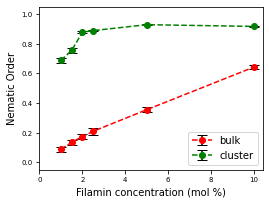

In [9]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)

#ax.plot(fvals, S_bulk[0,:], color='red', ls='--', marker='o')
ax.errorbar(fvals, S_bulk[0,:], yerr=S_bulk[1,:], color='red', ls='--', 
            marker='o', capsize=5, capthick=1, ecolor='black', label='bulk')

ax.errorbar(fvals, S_cluster[0,:], yerr=S_cluster[1,:], color='green', ls='--', 
            marker='o', capsize=5, capthick=1, ecolor='black', label='cluster')
ax.set_xlabel('Filamin concentration (mol %)')
ax.set_ylabel('Nematic Order')
plt.legend()
ax.set(ylim=[-0.05,1.05], xlim=[0,10.4])
plt.savefig( os.path.join(savepath, "Tac_S_vs_filamin.pdf"))

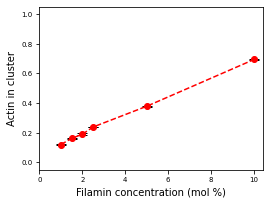

In [10]:
fig = plt.figure(figsize=(4, 3))
ax = fig.add_subplot(1, 1, 1)

#ax.plot(fvals, S_bulk[0,:], color='red', ls='--', marker='o')
ax.errorbar(fvals, actin_in[0,:], yerr=actin_in[1,:], color='red', ls='--', marker='o', capsize=5, capthick=1, ecolor='black')
ax.set_xlabel('Filamin concentration (mol %)')
ax.set_ylabel('Actin in cluster')
ax.set(ylim=[-0.05,1.05], xlim=[0,10.4])
plt.savefig( os.path.join(savepath, "Tac_actin_num_vs_filamin.pdf"))

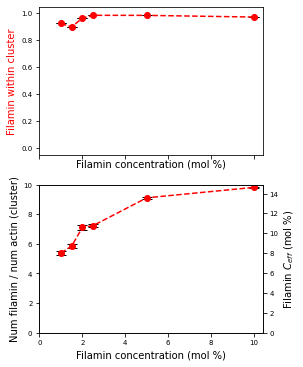

In [11]:
fig, axs = plt.subplots(2,1, figsize=(4, 6), sharex=True)
ax1 = axs[0]
ax2 = axs[1]
ax3 = ax2.twinx()

# convert ratio to effective concentration
filamin_to_actin_conc = (10/7)*filamin_to_actin

#ax.plot(fvals, S_bulk[0,:], color='red', ls='--', marker='o')
ax1.errorbar(fvals, filamin_in[0,:], yerr=filamin_in[1,:], color='red', ls='--', marker='o', capsize=5, capthick=1, ecolor='black')
ax1.set_xlabel('Filamin concentration (mol %)')
ax1.set_ylabel('Filamin within cluster', color = 'red')

ax2.errorbar(fvals, filamin_to_actin[0,:], yerr=filamin_to_actin[1,:], color='red', ls='--', marker='o', capsize=5, capthick=1, ecolor='black')
ax2.set_ylabel('Num filamin / num actin (cluster)')
ax3.set_ylabel('Filamin $C_{eff}$ (mol %)')
ax2.set_xlabel('Filamin concentration (mol %)')

ax1.set( xlim=[0,10.4], ylim=[-0.05, 1.05])
ax2.set( xlim=[0,10.4], ylim=[0, 10])

ax3.set( ylim=[0,14.9])
plt.savefig( os.path.join(savepath, "Tac_filamin_cluster.pdf"))